<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p1_p10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 1. Essentials of Signal Processing**

In [66]:
# Abstarct: This chapter introduces some of the basic signal processing concepts that will be used throughout this book.

**1.1 Generating standard test signals**

In [67]:
# In experimental modeling and simulation, simple test inputs such as sinusoidal, rectangular pulse, gaussian pulse,
# and chirp signals are widely used. These test signals act as stimuli for the simulation model and the response of the model
# to the stimuli is of great interest in design verification.

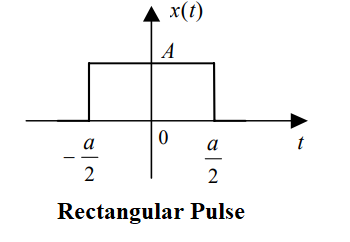

**1.1.1 Sinusoidal signals(정현파 신호)**

In [68]:
# 1) In order to generate a sine wave, the first step is to fix the frequency "f" of the sine wave.
# 2) Given the frequency of the sinewave, the next step is to determine the sampling rate.

 # For baseband signals, the sampling is straight forward.
 # 기저대역(baseband signals) 신호의 샘플링이 상대적으로 간단한 이유는 신호의 스펙트럼 특성이 명확하고, 이를 처리하기 위한
 # 필터링 및 샘플링 규칙이 잘 정의되어 있기 때문입니다.

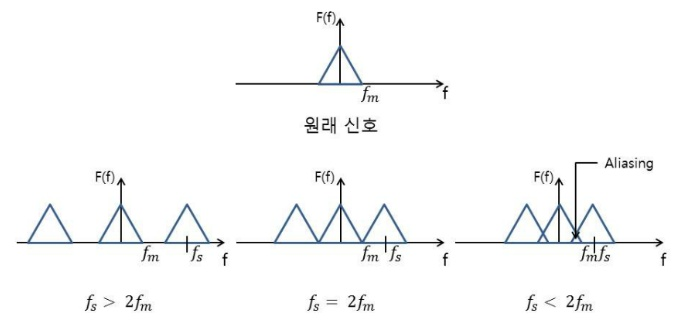

In [69]:
# Let us write a function to generate a sinusoidal signal using the Python's Numpy library.
# Numpy is a fundamental library for scientific computations in Python
import numpy as np

**signalgen.py**

In [70]:
def sine_wave(f, overSampRate, phase, nCyl):
  # generate sine wave signal with the following parameters

  fs=overSampRate*f # sampling frequency
  t=np.arange(0, nCyl*1/f-1/fs, 1/fs) # time base
# 사이클 수: 시간 x 주파수
# 사이클 수: 주파수 2Hz x 2초 =4 -> 사이클 수/주파수 = 2초: time base 값 설
  g=np.sin(2*np.pi*f*t+phase)
  return(t, g)

# Parameters
# 1) overSampRate: oversampling rate (integer)
# 2) phase: desired phase shift in radians
# 3) nCyl: number of cycles of sine wave to generate

In [71]:
# chapter_1 demo_scripts.py
def sine_wave_demo():
  # simulate a sinusodial signal with given sampling rate
  import numpy as np
  import matplotlib.pyplot as plt

  f=10
  overSampRate=30
  phase=1/3*np.pi
  nCyl=5
  (t,g)=sine_wave(f,overSampRate, phase, nCyl)

  plt.plot(t,g)
  plt.title('Sine wave f='+str(f)+'Hz')
  plt.xlabel('Time(s)')
  plt.ylabel('Amplitude')
  plt.show()
# Higher oversampling rate requires more memory for signal storage.
# It is advisable to keep the oversampling factor to an acceptable value.

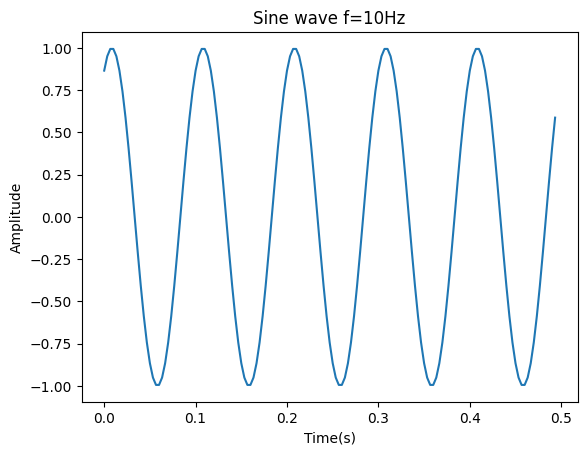

In [72]:
sine_wave_demo()

**1.1.2 Square wave**

In [73]:
# The most logical way of transmitting information across a communication channel is through a stream of square pulse -
# a distinct pulse for '0' and anotther for '1'.

# True square waves are a special class of rectangular waves with 50% duty cycle.
# Varying the duty cycle of a rectangular wave leads to pulse width modulation, where the information is conveyed by
# changing the duty-cycle of each transmitted rectangular wave.

# PWM: Pulse Width Modulation - 사각파의 duty cycle을 바꿈으로써, 펄스 폭 변조가 발생하고, 이때 정보는 전송된 사각파의
# duty cycle에 따라 정보(information)가 전달된다.

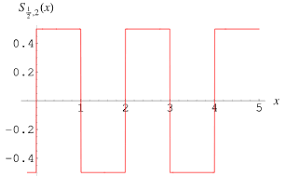

In [74]:
def square_wave(f, overSampRate, nCyl):
  # generate square wave signal with the follwoing parameters
  fs=overSampRate*f # sampling frequency
  t=np.arange(0, nCyl*1/f-1/fs, 1/fs) # time base
  g=np.sign(np.sin(2*np.pi*f*t))

  return (t,g)

In [75]:
def scipy_square_wave():
  # generate a square wave with given sampling rate
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy import signal

  f=10 # f=10Hz
  overSampRate=30 # oversampling rate
  nCyl=5 # number of cycles to generate

  fs=overSampRate * f # sampling frequency
  t=np.arange(start=0, stop=nCyl*1/f, step=1/fs) # time base
  g=signal.square(2*np.pi*f*t, duty=0.2)
  plt.plot(t,g)
  plt.title('Square wave f=10Hz, duty cycle=0.2')
  plt.xlabel('Time(s)')
  plt.ylabel('Amplitude')
  plt.show()

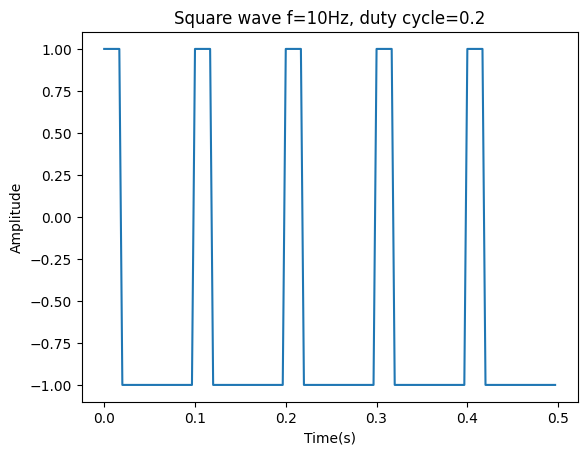

In [76]:
scipy_square_wave()

In [77]:
def scipy_square_wave():
  # generate a square wave with given sampling rate
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy import signal

  f=10 # f=10Hz
  overSampRate=30 # oversampling rate
  nCyl=5 # number of cycles to generate

  fs=overSampRate * f # sampling frequency
  t=np.arange(start=0, stop=nCyl*1/f, step=1/fs) # time base
  g=signal.square(2*np.pi*f*t, duty=0.5)
  plt.plot(t,g)
  plt.title('Square wave f=10Hz, duty cycle=0.5')
  plt.xlabel('Time(s)')
  plt.ylabel('Amplitude')
  plt.show()

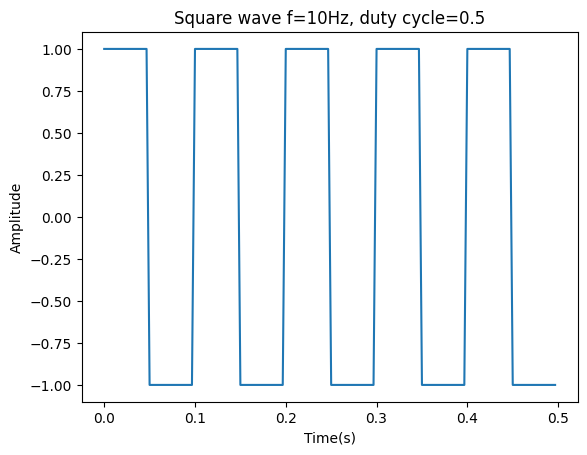

In [78]:
scipy_square_wave()

**1.1.3 Rectangular pulse**

In [79]:
def rect_pulse(A, fs,T):
  # generate isolated rectangular pulse with the following parameters
  t=np.arange(-0.5, 0.5, 1/fs)
  rect=(t>-T/2)*(t<T/2)+0.5*(t==T/2)+0.5*(t==-T/2)
  g=A*rect
  return (t,g)

  # fs: sampling frequency in Hz
  # A: amplitude of the rectangular pulse

In [80]:
rect_pulse(1,500,0.2)

(array([-5.0000000e-01, -4.9800000e-01, -4.9600000e-01, -4.9400000e-01,
        -4.9200000e-01, -4.9000000e-01, -4.8800000e-01, -4.8600000e-01,
        -4.8400000e-01, -4.8200000e-01, -4.8000000e-01, -4.7800000e-01,
        -4.7600000e-01, -4.7400000e-01, -4.7200000e-01, -4.7000000e-01,
        -4.6800000e-01, -4.6600000e-01, -4.6400000e-01, -4.6200000e-01,
        -4.6000000e-01, -4.5800000e-01, -4.5600000e-01, -4.5400000e-01,
        -4.5200000e-01, -4.5000000e-01, -4.4800000e-01, -4.4600000e-01,
        -4.4400000e-01, -4.4200000e-01, -4.4000000e-01, -4.3800000e-01,
        -4.3600000e-01, -4.3400000e-01, -4.3200000e-01, -4.3000000e-01,
        -4.2800000e-01, -4.2600000e-01, -4.2400000e-01, -4.2200000e-01,
        -4.2000000e-01, -4.1800000e-01, -4.1600000e-01, -4.1400000e-01,
        -4.1200000e-01, -4.1000000e-01, -4.0800000e-01, -4.0600000e-01,
        -4.0400000e-01, -4.0200000e-01, -4.0000000e-01, -3.9800000e-01,
        -3.9600000e-01, -3.9400000e-01, -3.9200000e-01, -3.90000

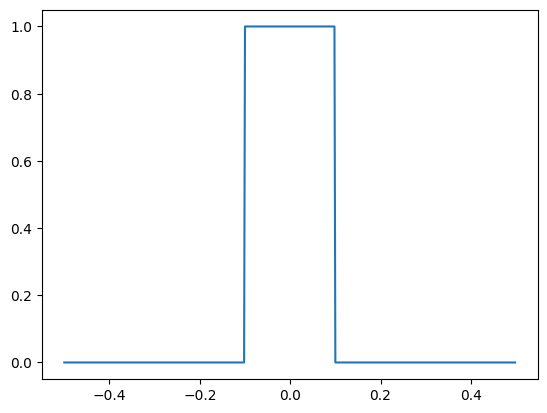

In [86]:
import matplotlib.pyplot as plt
A=1; fs=500;T=0.2;

(t,g)=rect_pulse(A,fs,T)
plt.plot(t,g)

**1.1.4 Gaussian pulse**

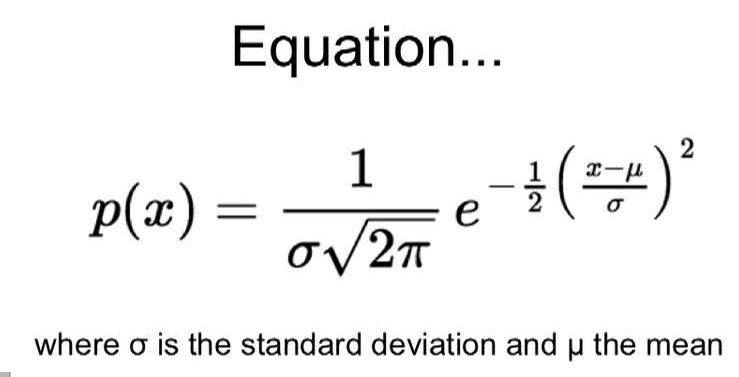

In [87]:
# Gaussian filter has minimum group delay.
# The impulse response of a Gaussian filter is writtend as Gaussian function.
def gaussian_pulse(fs, sigma):
  # generate isolated gaussian pulse with the following parameters
  t=np.arange(-0.5, 0.5, 1/fs) # time base
  g=1/(np.sqrt(2*np.pi)*sigma)*(np.exp(-t**2/(2*sigma**2)))
  return (t,g)

# sigma: pulse width in seconds

Text(0, 0.5, 'Amplitude')

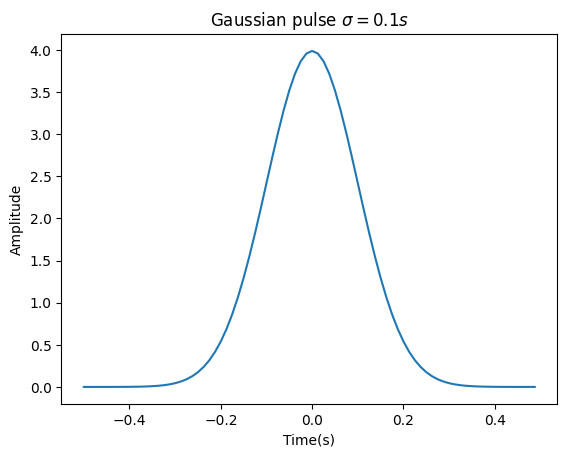

In [91]:
fs=80; sigma=0.1
(t,g)=gaussian_pulse(fs,sigma)

import matplotlib.pyplot as plt
plt.plot(t,g)
plt.title('Gaussian pulse $\sigma=0.1s$')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

**1.1.5 Chirp signal**

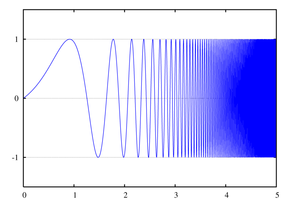

In [ ]:
# A signal that varies in frequency over time is called chirp.
# One approach to generate a chirp signal is to concatenate a series of segments of sine waves each with increasing frequency in order.

In [94]:
def chirp_demo():
  # generating and plotting a chipr signal
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.signal import chirp

  fs=500
  t=np.arange(start=0, stop=1, step=1/fs) # totla time base from 0 to 1 second
  g=chirp(t, f0=1, t1=0.5, f1=20, phi=0, method='linear')
  plt.plot(t,g);
  plt.title('Chirp Signal')
  plt.xlabel('Time(s)')
  plt.ylabel('Amplitude')
  plt.show()

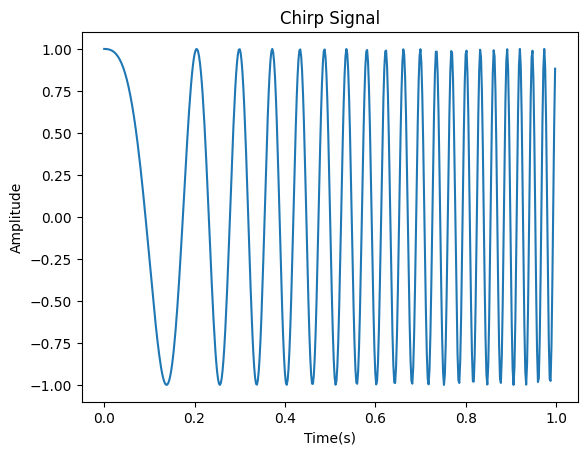

In [95]:
chirp_demo()

**1.2 Interpreting FFT results - complex DFT, frequency bins and FFT Shift**

In [ ]:
# Often, one is confronted with the problem of converting a time domain signal to frequency domain and vice-versa.
# Fourier transform is an excellent tool to achieve this conversion and is ubiquitously used in many applications.